# The Tips Data Set

### Fundamentals of Data Analysis Assessment

## 1. Introduction
This notebook begins with a description of the tips data set obtained using summary statistics. There follows a section on regression to investigate if there is a relationship between the total bill and the tip amount. Finally, any interesting relationships between variables within the data set are teased out and investigated further. Findings from each part of the analysis are summarized in the README file.

### Preliminaries
Load the various packages required to complete the work and set up the matplotlib plotting environment.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.linear_model as lm

***
## 2. Description of the data set

Load the data set to a dataframe and take a quick look at it by printing the first and last five lines.

In [2]:
# Load the data set.
tips = sns.load_dataset("tips")

# Size?
shape = tips.shape
print("Data frame shape", shape, "r,c")

# Print the first/last five lines.
tips.head()

Data frame shape (244, 7) r,c


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The rows of the data set contain **244** observations of the total bill and tip left in a resaurant, along with information about party size, day of the week, time of day, gender of the tipper, and whether or not they are a smoker. Three columns contain numeric data with class labels *total_bill*, *tip*, and *size*. The remaining four columns contain categorical data (divided into discrete groups) with class labels *sex*, *smoker*, *day*, and *time*. 

In [4]:
# Check for NaNs etc
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

Looks like there are no funny values in the data set so we can proceed without cleaning.

In [5]:
# Look at some quick descriptive statistics of the numeric data.
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Although this is useful, when we think of tips we usually imagine a percentage of the bill. I would say that the most important information contained in the data set is the tip as a fraction of the total bill. For this I will assume that the total_bill is the bill before the tip has been added in. 

In [6]:
# Make an empty data frame to hold tip as fraction of total bill.
ftip = pd.DataFrame(columns=['ftip'])
ftip['ftip'] = tips['tip']/tips['total_bill']

# Attach it to tips dataframe I think so can use groupby etc, work with df from now on.
df = pd.concat([ftip, tips], axis=1)

df.head( )

,ftip,total_bill,tip,sex,smoker,day,time,size
0,0.059447,16.99,1.01,Female,No,Sun,Dinner,2
1,0.160542,10.34,1.66,Male,No,Sun,Dinner,3
2,0.166587,21.01,3.50,Male,No,Sun,Dinner,3
3,0.139780,23.68,3.31,Male,No,Sun,Dinner,2
4,0.146808,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Get descriptive statistics for all columns, not just the numeric ones.
df.describe(include="all")

,ftip,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,NaN,157,151,87,176,NaN
mean,0.160803,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,0.061072,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,0.035638,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,0.129127,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,0.154770,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,0.191475,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


- It looks as if the average tip is about 17% of the total bill, although some very generous diner tipped 70% and a stingy one left only 3%.
- The 50th percentile, or median, fractional tip is very similar to the mean fractional tip. This implies that the mean value is a typical value in the data set. 
- There are two unique values of sex, which we know to be Male and Female. Of the 244 observations, 157 concern males.
- There are two unique values of smoker, which we know to be Yes or No. Of the 244 observations, 151 concern smokers.
- Four unique values of day, Saturday being the most frequent with 87 of the 244 observations.
- Two unique values of time, with most meals being dinner: 176 of the total.
- Party size varied from 1 to 6.

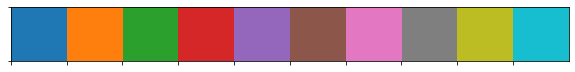

In [8]:
# Set up my plotting preferences.
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.set_style('whitegrid')
#sns.set_size(3,3) # come back to this

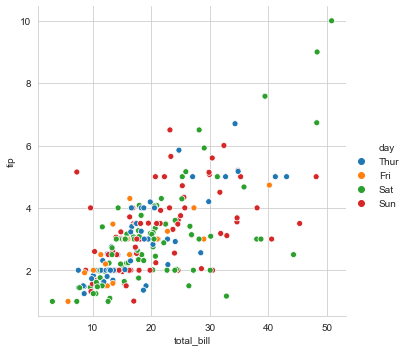

In [9]:
# How does tip vary with total_bill?
sns.relplot(x="total_bill", y="tip", hue='day', data=df)

It appears that the tip does increase as the total_bill goes up. We'll be looking at this in more detail in the section on regression. For now, we'll plot the tip as a fraction of the total bill. This should be roughly a constant with some spread reflecting the range of straight lines that could be drawn through the data in the plot above.

Text(0, 0.5, 'fractional tip')

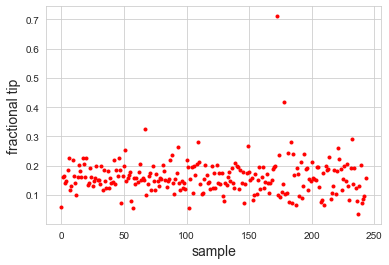

In [10]:
# Tip as a fraction of the total_bill.
plt.plot(df['ftip'], '.r')
plt.xlabel('sample', fontsize='14')
plt.ylabel('fractional tip', fontsize='14')


There seems to be one outlier - the 70% tip. It might be better to ignore it, we'll see later. For now just find it's location and who it refers to.

In [30]:
#df.index[df['ftip'] > 0.5]
df.iloc[df.index[df['ftip'] > 0.5]]

,ftip,total_bill,tip,sex,smoker,day,time,size
172,0.710345,7.25,5.15,Male,Yes,Sun,Dinner,2


In [31]:
# What are the days and dining times contained in the data set?
print("Dining times are: ", df.time.unique())
print("Days are: ", df.day.unique())

Dining times are:  [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]
Days are:  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


### Dig deeper into the data set.
I will now look at how some of the other variables affect tip size. Although Seaborn allows for some very complicated visualizations, I prefer not to put too much information on one plot at this stage.

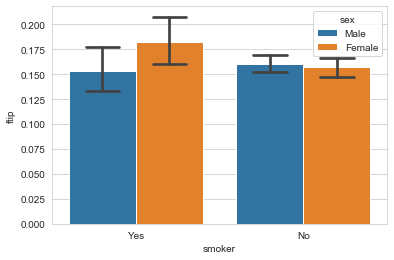

In [32]:
# Plot the fractional tip for smokers/non-smokers and male/female.
sns.barplot(x= 'smoker', y= 'ftip', hue='sex', data = df, capsize=.2)

This Seaborn barplot shows the mean fractional tip for male/female smokers/non-smokers. The error bars mark the 95% confidence interval: range within which there is a 95% chance that the mean lies. Looks like male and female non-smokers leave very similar fractional tips. However, female smokers leave larger tips, in terms of percentage, than male smokers.

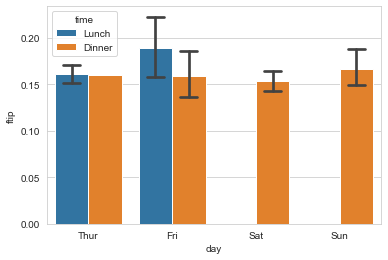

In [14]:
# How does the time affect the fractional tip?
sns.barplot(x="day", y="ftip", hue="time", data=df, capsize=.2)

From the above plot we see that while data from only dinner is recorded on Saturday and Sunday, both lunch and dinner are recorded on Fridays, and there seems to be only one observation relating to dinner on Thursday. We will look at how the variables are intertwined later on in the notebook.

***
## 3. Regression

Now we will check to see if there is a relationship between the total bill and tip amount? We'll begin by using Seaborn to graphically look at all rows in the data set and check for a linear relationship.

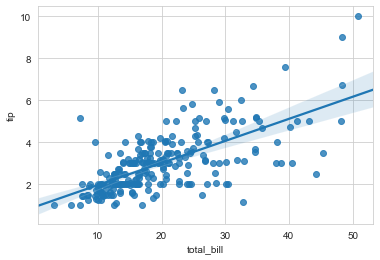

In [33]:
sns.regplot(x="total_bill", y="tip", data=df)

The shaded region in Seaborn regplot represents a 95% confidence interval for the regression. I would say this isn't a great fit, although there appears to be a linear relationship there. I wonder if subsets of the data might give *prettier* looking fits?

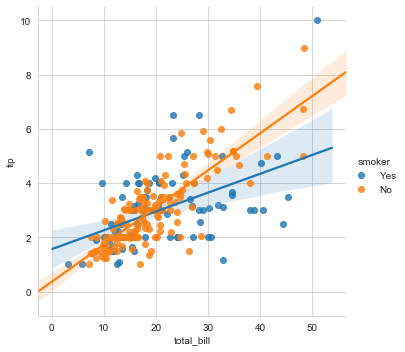

In [34]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

Confidence intervals don't even overlap here. One to explore later?

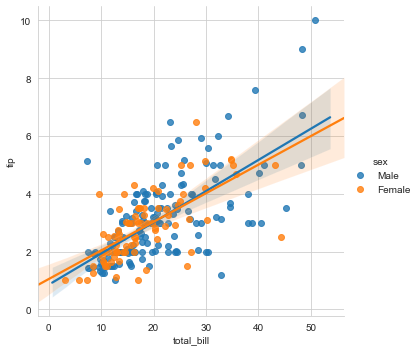

In [17]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)

Very good overlap between confidence intervals here, so probably not worth considering gender alone as an interesting factor? 

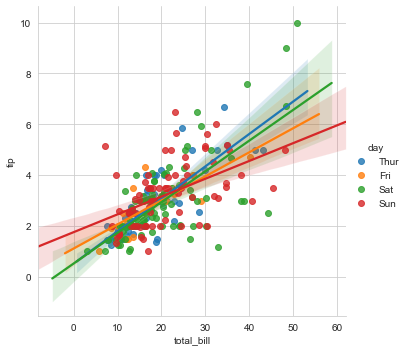

In [35]:
sns.lmplot(x="total_bill", y="tip", hue="day", data=tips)

Hard to tell what's going on here.

### Regression using statsmodels

$$tip = m * total bill + c$$

In [36]:
c_sm = sm.add_constant(df['total_bill'])# add an intercept
model_sm = sm.OLS(df['tip'], c_sm)
fit_sm = model_sm.fit()
print(fit_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           6.69e-34
Time:                        20:20:27   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

Comment on fit. R squared is not great.

### Regression using scikit learn

In [37]:
model = lm.LinearRegression()
X = df[['total_bill']]
y = df['tip']

In [38]:
# X must be [[]], why?
model.fit(X, y)
print('Coefficients: \n', model.coef_)

Coefficients: 
 [0.10502452]


***
## 4. Relationships between variables

In the section on regression above, we investigated if the tip amount is related to the total bill. We found that it was. We can also ask other questions of the data. Do smokers tip more than non-smokers? Do men tip less than women? Are diners more likely to leave a large tip if they eat in the evening as part of a large group, rather than at lunch with a single friend? Does the day of the week matter at all? We will address some questions like these in the section.